# ECS7024 Statistics for Artificial Intelligence and Data Science
## London Underground Peak Hour Exit Analysis 
## Coursework 1 Submission - Huy Quang Pham

This Notebook details the process of analysing the London Underground exit data as per the instructions outlined in the coursework. This will consist of 3 parts:
1. Data Preparation (equivalent to Part 1 instructions)
2. Visualization and Distribution Analysis (equivalent to Part 2 instructions)
3. Classification (equivalent to Part 3 instructions)


## Part 1: Data preparation (Calculating Morning and Evening Peak Proportions)

Here is a step by step general overview of this part:
1. Import data and assign it to a dataframe variable
2. Calculate for each station the number of exits for AM and PM Peaks (as the sum of exits from 7:00 -> 9:00 and 16:00 -> 18:00 respectively)
3. Calculate for each station the total number of exits throughout the day, and the percentage of exits falling within the AM/PM Peaks

### Step 1.1: Import data and assign it to a dataframe variable

Pandas' data frame structure will be used so the Pandas library need to be imported.

The dataset is then imported as a variable *(name: **exits**, type: DataFrame)*.

In [1]:
import pandas as pd
exits = pd.read_csv('hourlyExits.csv',index_col='Station')

### Step 1.2: Calculate the number of exits for AM and PM Peaks

The number of **AM Peak exit** *(name: **AMcount**, type: Series)* and **PM Peak exit** *(name: **PMcount**, type: Series)* is calculated by taking the sum of exits during these corresponding peak hours.

Then a new data frame is created to include these 2 series as a new column along with all the original column *(name: **peak_counts**, type: DataFrame)*, which was previewed in the code below:

In [2]:
AMcount = exits.loc[:, "H07":"H09"].sum(axis=1)
PMcount = exits.loc[:, "H16":"H18"].sum(axis=1)
peak_counts = exits.assign(AMcount = AMcount, PMcount = PMcount)
peak_counts

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H18,H19,H20,H21,H22,H23,H00,H01,AMcount,PMcount
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,1077,793,505,424,424,366,210,54,1970,2628
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,1155,566,331,260,237,171,58,0,7408,2992
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,1605,1127,708,560,532,457,239,26,7618,3803
Alperton,16,101,230,372,254,149,137,152,176,205,...,724,424,222,161,143,146,72,6,856,1847
Amersham,3,18,82,246,96,56,48,62,75,94,...,692,540,287,182,154,175,99,6,424,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,467,333,183,146,139,108,53,10,497,1114
Wood Green,17,154,450,831,884,557,528,604,705,802,...,2606,1802,1123,862,799,773,497,78,2165,6494
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,646,354,187,117,101,71,28,4,1798,1766


### Step 1.3: Calculating the total number of exits and the AM/PM Peak Proportion

Similarly the number of **total exits** *(name: **Total**, type: Series)* is calculated by taking the sum of exits of all hours. 

This is then added to the previously created data frame, alongside the AM/PM Peak Percentage of Exits *(name: **AMperc**; **PMperc**)* which is calculated by dividing the number of exits during Peak hours over the total number of exits (AMPeak/Total; PMPeak/Total).

A new consolidated data frame *(name: **peak_count_perc**, type: data frame)* was created with just the 5 newly created columns (excluding the hourly columns) for easier analysis.

In [3]:
Total = exits.sum(axis=1)
peak_count_perc = peak_counts.iloc[:, -2:].assign(Total = Total, AMperc = AMcount/Total, PMperc = PMcount/Total)
peak_count_perc

,AMcount,PMcount,Total,AMperc,PMperc
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


## Part 2: Visualization and Distribution Analysis (Plotting and Analysing Distributions)

Here is a step by step general overview of this part:
1. Get summary statistics and plot histogram of AM and PM Peak Percentage
2. Calculate and plot Peak hour exits as a percentage of total exits, as well as the Percentage difference between AM and PM peaks to further understand the data

### Step 2.1: Summary statistics and histogram plot of AM and PM Peak Percentage

In [4]:
peak_count_perc.describe()

,AMcount,PMcount,Total,AMperc,PMperc
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


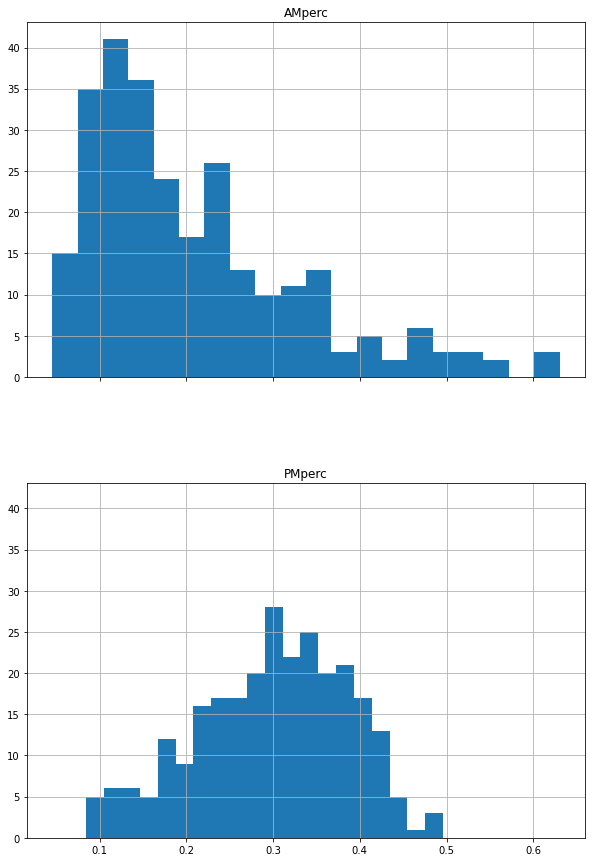

In [5]:
peak_perc = peak_count_perc.iloc[:, 3:]
plt = peak_perc.hist(bins=20, figsize=(10,15), sharex = True, sharey = True, layout = (2,1), xlabelsize = 10)

**It can be concluded from the description and the plots above that:**
1. On average, the AM Peak accounts for 20.71% of all exits during the day, with exceptionally higher usage in a few stations. The distribution in the percentage of exits during the AM Peak is positively skewed, meaning while both measures of central tendency falls around 15-20% (mean = 20.71%, median = 16.93%) and the interquartile range spreading from 11.61% to 26.64%, there were a few dispersed observations on the right tail reaching above 50% or even 60% that can be considered outliers (left tail cannot go below 0%). These are the stations where the majority of all the exits during the day occurs within the AM Peak hours. 


2. The PM Peak in general sees more exits than the AM Peak. Although individually there are no stations in which more than 50% of exits occur during the PM Peak, the middle 50% of the PM Peak exit proportion have an overall higher value spread from 24.09% to 36.16% compared to that of the AM Peak (11.61% to 26.64%), and a higher mean (29.88% vs 20.71%) and median (30.74% vs 16.93%). The PM Peak Exit Percentage is slightly negative skewed with a longer left tail.


3. There are more variation between the proportion of exits in the AM peak among stations compared to the PM peak. The distribution in the AM peak are more well spread, meaning there will be stations with disproportionately high or low level of commuters exiting from 07:00 to 09:00, while that of PM Peak are more densely distributed, implying more homogeneity in the usage of stations from 16:00 to 18:00. Both are unimodal distributions, with AM Peak Exit Percentage peaking around 7-15%, and PM Peak Exit peaking around 30-40%.

### Step 2.2: The patterns of combined Peak hour exits and difference between PM Peak and AM Peak exits 

The 2 following plots show the distribution of AM+PM Peak exits as a percentage of total number of exits; and the distribution of the percentage difference between PM Peak exits and AM Peak exits.

<AxesSubplot:>

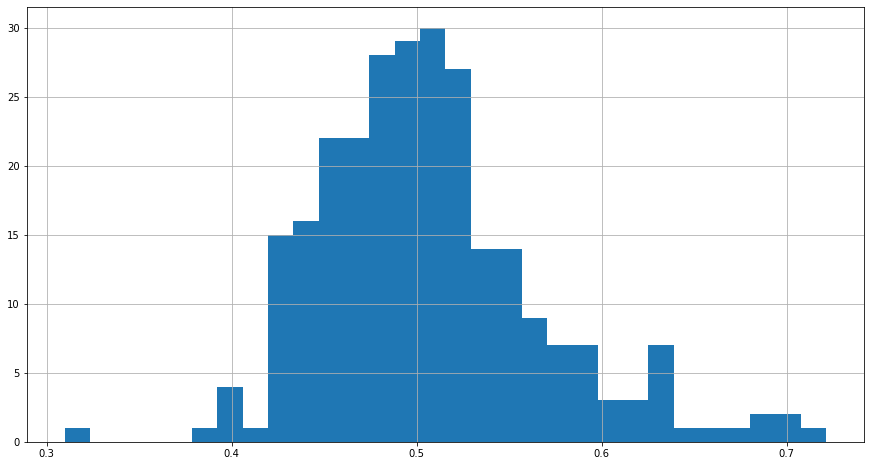

In [6]:
peak_perc.sum(axis=1).hist(bins=30, figsize=(15,8), xlabelsize = 10)

A closer look into the combined percentage of exits during peak hours paints a clearer picture of station usage during peak hours. Most stations have 40-60% of exits during the 6 hours of AM and PM Peaks, none has less than 30%, and only a few over 70%.


<AxesSubplot:>

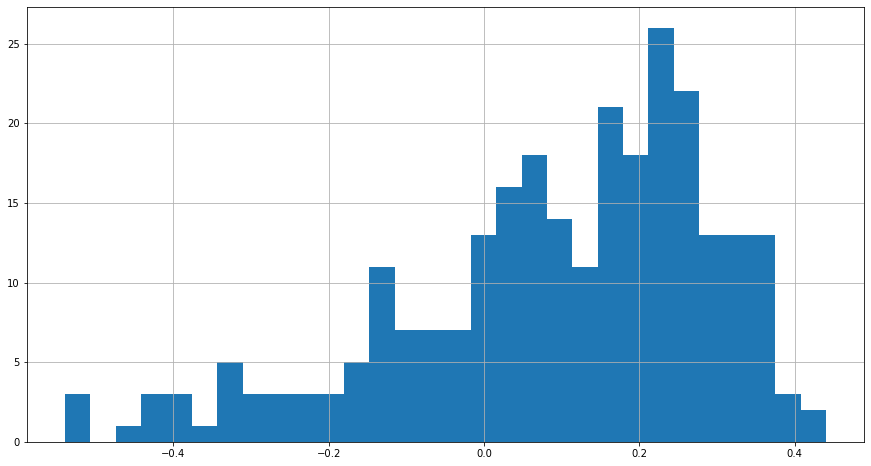

In [7]:
PMvsAM = peak_perc.PMperc - peak_perc.AMperc
PMvsAM.hist(bins=30, figsize=(15,8))

Plotting the difference between the percentage of PM Peak exits and that of AM Peak exits reveal that it is true that the majority of stations have more people exiting during the PM Peak than the AM Peak.

### Part 3: A Simple Classification of Northern Line Stations


Stations will be classified into 3 categories: Work, Residential and Other based on the following crriteria:
1. A percentage difference of lower than 10% is considered not significant -> Any station with -10% < %PMPeak - %AMPeak < 10% will be classified as 'Other'.
2. Any station with %PMPeak - %AMPeak equal to or greater than 10% will be classified as 'Residential'
3. Any station with %AMPeak - %PMPeak equal to or greater than 10% will be classified as 'Work'

Because not all people have a 9-to-5 job and commute for a multitude of reasons (site visit, leisure, traveling, etc.), 10% have been set as a threshold between 'Other' and the other classes. Although arbitrary, it is clear from the difference between PM peak and AM peak above that all 3 classes would have quite considerable number of representations, and also it fits my assumption that there are more residential stations in London than work stations since most companies tend to have offices in Zone 1. 

Here is the step-by-step overview of this part:

1. Create a new data frame with the percentage of AM and PM Peak exits for the Northern Line stations 
2. Add another column classifying these stations based on the 2 values and the criteria above
3. Evaluate the results of the classification

### Step 3.1: Create a new data frame with the percentage of AM and PM Peak exits for the Northern Line stations 
This is done by using the previous data frame **peak_perc** and filtering all the given stations (which is included in the list **northern_stations** (new data frame called **northern_peak**).

In [8]:
northern_stations = ["Archway", "Balham", "Embankment", "Goodge Street", "Highgate"\
                    , "High Barnet", "Leicester Square", "Morden", "South Wimbledon"\
                    , "Tottenham Court Road", "Warren Street"]

northern_peak = peak_perc.loc[northern_stations, :]
northern_peak

,AMperc,PMperc
Station,,
Archway,0.157158,0.294654
Balham,0.119170,0.345038
Embankment,0.316509,0.261360
Goodge Street,0.419287,0.152064
Highgate,0.100101,0.355341
High Barnet,0.144235,0.345170
Leicester Square,0.187390,0.270347
Morden,0.098852,0.379783
South Wimbledon,0.185494,0.305405


### Step 3.2: Add another column classifying these stations based on the 2 values and the criteria above
This is done by creating a classification function...

In [9]:
def classify_station(am, pm):
    if abs(am - pm) < 0.1:
        val = 'Other'
    elif am > pm:
        val = 'Work'
    else:
        val = 'Residential'
    return val

...And applying that function to each and every row. The output is saved to a new column (called **Type**).

In [10]:
northern_peak["Type"] = northern_peak.apply(lambda x: classify_station(am=x.AMperc, pm=x.PMperc), axis = 1)
northern_peak

,AMperc,PMperc,Type
Station,,,
Archway,0.157158,0.294654,Residential
Balham,0.119170,0.345038,Residential
Embankment,0.316509,0.261360,Other
Goodge Street,0.419287,0.152064,Work
Highgate,0.100101,0.355341,Residential
High Barnet,0.144235,0.345170,Residential
Leicester Square,0.187390,0.270347,Other
Morden,0.098852,0.379783,Residential
South Wimbledon,0.185494,0.305405,Residential


### Step 3.3: Evaluate the results of the classification

As seen from the Tube map, the 3 stations labeled 'Work' (Tottenham Court Road, Goodge Street and Warren Street) are all in the middle of Zone 1 where a lot of companies have offices. All 6 stations labeled 'Residential' are in Zone 3-5, where it is expected to mostly be residential areas. 2 stations labeled as 'Other' (Leicester Square, Embankment) are in Zone 1 city centre but close to a lot of tourist attraction / leisure activities, so they are more multi-purpose compared to other stations. 